<a href="https://colab.research.google.com/github/yannluethi/BINA/blob/main/Case-Study/Python/BINA_Case-Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Dos:

*  Map - Fabio
*  Verspätungen berechnen (df bereinigt, df verspaetung, df ausfall) - Allan
* Ideen sammeln zu Plots/Darstellungen (sanbox)- Alle
 * Verspätungen pro Wochentag - Allan
 * Verspätungen pro Zuglinie - Fabio
 * Verspätungen pro Verkehrsmittel -> IR, IC etc.? - Fabio
 * Regressionsanalyse - Ist der Wochentag ein predictor für Verspätungen? - Allan
 * Verspätungen pro Tageszeit - Yann
 * Ausfälle pro Wochentag - Allan
 * Ausfälle pro Tageszeit - Yann
 * Ausfälle pro Zuglinie - Fabio
 * Wieviel Prozent der Ausfälle/Verspätungen liegen in den Schulferien - Allan

Später:
* Code bereingien (import, initalisieren, Kommentare, Einrückungen, etc.)
* Texte / Beschreibung (Redundanzen vermeiden)
* Collecting data -> Daten beschreiben -> df.head ()



In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

#<font color='blue'>Verspätungen am Bahnhof Flughafen Zürich</font>

### BINA - Business Intelligence & Analytics (FS24)
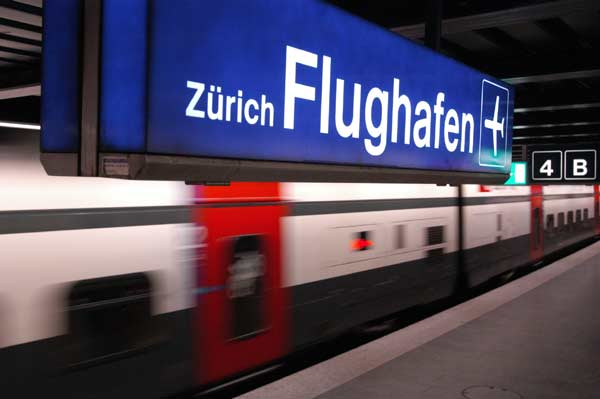

###Studierende
&nbsp;Yann Lüthi

&nbsp;Allan McGee

&nbsp;Fabio Spaar

###Dozent
&nbsp;Daniel Benninger

#Five-Step Framework - From Data to Decision
Das Vorgehen für die vorliegende Case Study richtet sich nach der CPA Management Accounting Guideline "From Data to Decision". Die Guideline enthält fünf Schritte, welche eine systematische Herangehensweise und Anleitung bieten, um Daten zu analysieren, zu interpretieren und fundierte Entscheidungen zu treffen. Nachfolgend werden die fünf Schritte erläutert:

* **Step 1: Defining objectives and information needs:** Definition der Fragestellung oder des Problems, das adressiert werden soll. Dies könnte sich auf ein spezifisches geschäftliches Szenario, eine Branche oder eine organisatorische Herausforderung beziehen. Bestimmen, welche spezifischen Informationen benötigt werden, um die Fragestellung zu beantworten oder das Problem zu lösen.
* **Step 2: Collecting data:** Ermitteln welche Datenquellen verfügbar sind und genutzt werden können, um die benötigten Informationen zu sammeln. Dies könnte Unternehmensdaten, Branchenberichte, akademische Publikationen oder Datenbanken umfassen. Sammeln der Daten, wobei beachtet werden muss, dass sie relevant, aktuell und so präzise wie möglich sind.
* **Step 3: Analyzing data:** Geeignete analytische Methoden anwenden, um die gesammelten Daten zu untersuchen. Interpretieren der Analyseergebnisse im Kontext der Case Study, um verständliche und aussagekräftige Schlussfolgerungen daraus ziehen zu können.
* **Step 4:Presenting information:** Entwickeln einer klaren und überzeugenden Darstellung der Ergebnisse, die die wichtigsten Erkenntnisse, Schlussfolgerungen und Empfehlungen hervorhebt.
* **Step 5: Making data-driven decision:** Formulieren konkreter Empfehlungen für Entscheidungen oder Massnahmen, die ergriffen werden sollten. Entwerfen von möglichen Umsetzungsschritten, welche zur Lösung der ursprünglichen Fragestellung oder des Problems beitragen können.

Für die Bearbeitung der Case Study sind die Schritte 1-4 relevant. Entsprechend wird der Inhalt des Jupyter Notebooks nach diesen vier Schritten strukturiert.


# Step 1: Defining objectives and information needs

## Einleitung und Ausgangslage
Die Schweizerische Bundesbahnen (SBB) gelten weltweit als eines der zuverlässigsten Bahnunternehmen. Dennoch sind Verspätungen im öffentlichen Verkehr unvermeidlich, und auch die SBB sind davon nicht ausgenommen. In diesem Kontext ist es interessant, einen genaueren Blick auf die Gründe für Verspätungen bei der SBB zu werfen und zu erfahren, wie die Bundesbahnen mit diesen Herausforderungen umgeht. Trotz ihrer hohen Pünktlichkeitsrate ist die SBB stets bestrebt, ihre Servicequalität zu verbessern.

Im Kontext des Moduls Binar plant die SBB eine gründliche Analyse der Zugfahrzeiten aufgrund negativer Kunden-, bzw. Passagierrückmeldungen, um Massnahmen zur Verbesserung der Pünktlichkeit und Zuverlässigkeit abzuleiten. Speziell für den Bahnhof Flughafen Zürich sollen Analysen durchgeführt werden, um etwaige Herausforderungen zu identifizieren und die Effizienz des Fahrplans zu steigern. Die gewonnenen Erkenntnisse werden als Grundlage für mögliche Anpassungen im Fahrplan, Infrastrukturverbesserungen und Schulungen dienen, um die Zufriedenheit zu erhöhen und die Gesamterfahrung der Fahrgäste zu optimieren.

Die Abfahrts- und Ankunftszeiten im Zugverkehr können durch verschiedene Faktoren beeinflusst werden, darunter Wochentage, Ferien und Jahreszeiten. Wochentage können unterschiedliche Verkehrsaufkommen hervorrufen, während Ferien und Jahreszeiten zu veränderten Reisemustern und infrastrukturellen Herausforderungen führen können. Die Analyse dieser Faktoren ist entscheidend, um Schwachstellen im Fahrplan zu identifizieren und Strategien zur Anpassung an dynamische Anforderungen zu entwickeln.

## Abgrenzung
Die Projektgruppe legt dabei den Fokus auf den Bahnhof Flughafen Zürich. Dieser Bahnhof eigent sich gut für die Analyse, da er ein hohes Passagieraufkommen aufweist und gewisse Abhängigkeiten zum Flugverkehr aufweist.

# Step 2: Collecting Data

## Datengrundlage
Für die Analyse der Fahrdaten des Bahnhofs Flughafen Zürich dient die Open-Data-Plattform Mobilität Schweiz als umfassende Datengrundlage. Diese Plattform, zugänglich unter https://opentransportdata.swiss/de/ist-daten-archiv/, stellt eine vielfältige Sammlung von Daten im Bereich der öffentlichen Mobilität in der Schweiz zur Verfügung. Um gezielt die Daten für den Bahnhof Flughafen Zürich zu extrahieren, wurde eine spezifische Auswahl vorgenommen, um ausschliesslich relevante Informationen zu erhalten.

Die Datenbeschaffung erfolgte im Zeitraum des letzten Jahres (2023). Durch diese zeitliche Begrenzung wird sichergestellt, dass die Analyse auf aktuellen und relevanten Informationen basiert. Die ausgewählten Datensätze umfassen Informationen über Ankunfts- und Abfahrtszeiten, Zugverbindungen, eventuelle Verspätungen sowie weitere relevante Details, die für eine detaillierte Analyse der Pünktlichkeit am Flughafen Zürich von Bedeutung sind.

Die Verwendung der Open-Data-Plattform Mobilität Schweiz ermöglicht nicht nur eine präzise und umfangreiche Datengrundlage, sondern fördert auch die Transparenz und den freien Zugang zu öffentlichen Verkehrsdaten. Dies bildet die Grundlage für eine fundierte Analyse, um mögliche Muster, Ursachen und Trends in Bezug auf Verspätungen am Bahnhof Flughafen Zürich zu identifizieren.

## Datenaufbereitung
Erklärtext zum Skript ExtractionFromCSV.py

Benötigte Python Packages:

pandas
os
openpyxl

Quelle für dtype Spezifikation:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
import pandas as pd
import os

# Pfad zum Ordner mit den CSV-Dateien
ordner_pfad = '/Ordnerpfad/Input Folder'

# Definition der Datentypen, damit pd.read_csv diese richtig erkennt und einlesen kann
datentypen = {
    'BETRIEBSTAG': str,
    'FAHRT_BEZEICHNER': str,
    'BETREIBER_ID': str,
    'BETREIBER_ABK': str,
    'BETREIBER_NAME': str,
    'PRODUKT_ID': str,
    'LINIEN_ID': str,
    'LINIEN_TEXT': str,
    'UMLAUF_ID': str,
    'VERKEHRSMITTEL_TEXT': str,
    'ZUSATZFAHRT_TF': bool,
    'FAELLT_AUS_TF': bool,
    'BPUIC': str,
    'HALTESTELLEN_NAME': str,
    'ANKUNFTSZEIT': str,
    'AN_PROGNOSE': str,
    'AN_PROGNOSE_STATUS': str,
    'ABFAHRTSZEIT': str,
    'AB_PROGNOSE': str,
    'AB_PROGNOSE_STATUS': str,
    'DURCHFAHRT_TF': str
}

# Initialisierung eines leeren Dictionary, um die DataFrames zu speichern
dataframes = {}


# Durchlaufen aller Dateien im angegebenen Ordner
for dateiname in os.listdir(ordner_pfad):
    if dateiname.endswith('.csv'):  # Überprüfen, ob die Datei eine CSV-Datei ist
        voller_dateipfad = os.path.join(ordner_pfad, dateiname)

        # Einlesen der CSV-Datei in ein DataFrame
        df = pd.read_csv(voller_dateipfad, sep=';' , dtype=datentypen) #Trennzeichen und Datentypen definieren

        # Ersetzen Sie NA-Werte in der 'DURCHFAHRT_TF'-Spalte durch False
        # Dies wird gemacht, weil NA-Werte zu Problemen geführt hatten. Im ganzen Datensatz ist dieser immer FALSE
        df['DURCHFAHRT_TF'] = df['DURCHFAHRT_TF'].fillna(False)

        # Entfernen der Dateiendung (.csv) vom Dateinamen, um diesen als Identifikator im Dictionary zu verwenden
        schlüssel = dateiname[:-4]

        # Hinzufügen des DataFrame zum Dictionary
        dataframes[schlüssel] = df

# Erstellen eines neuen Dictionary, um die gefilterten DataFrames zu speichern
gefilterte_dataframes = {}

for schlüssel, df in dataframes.items():
    # Filtern nach Linien der SBB, welche am Zürich Flughafen halten
    gefiltert = df[(df['BETREIBER_ABK'] == 'SBB') & (df['HALTESTELLEN_NAME'] == 'Zürich Flughafen')]

    # Speichern des gefilterten DataFrames im neuen Dictionary
    gefilterte_dataframes[schlüssel] = gefiltert

    # Anzeigen der Anzahl der Datensätze im gefilterten DataFrame
    anzahl_datensaetze = len(gefiltert)
    print(f"Anzahl der Datensätze im gefilterten DataFrame für {schlüssel}: {anzahl_datensaetze}\n")
    print("\n")

# Zusammenführen aller gefilterten DataFrames in einen einzigen DataFrame
gesamter_dataframe = pd.concat(gefilterte_dataframes.values(), ignore_index=True)

# Pfad, wo die Excel-Datei gespeichert werden soll
excel_dateipfad = '/Ordnerpfad/Output Folder/ZRH_Flughafen_2023.xlsx'

# Exportieren des gesamten DataFrames als Excel-Datei
gesamter_dataframe.to_excel(excel_dateipfad, index=False)

# Feedback
print(f"Der gesamte DataFrame wurde erfolgreich als Excel-Datei gespeichert: {excel_dateipfad}")


## GitHub-Integration
GitHub bietet eine bewährte Plattform für die Versionskontrolle, die es ermöglicht Änderungen nachzuverfolgen und gemeinsam an Projekten zu arbeiten. Um für unsere Case Study die Zusammenarbeit in Google Colab zu vereinfachen wird die GitHub-Integration in Google Colab verwendet. Änderungen am Jupyter Notebook sowie an den Daten sind somit jederzeit nachvollziehbar.

In [ ]:
# Copy GIT repository to Google Colab environment
!git clone https://github.com/yannluethi/BINA.git

In [ ]:
# Change to Data directory
%cd BINA/Case-Study/Data

## Datenstruktur

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import calendar
from IPython.display import HTML
%matplotlib inline

In [ ]:
#read file to see file structure of .excel filesof matching table ZRH_Flughafen_2023.xlsx
sbb = pd.read_excel("ZRH_Flughafen_2023.xlsx")
sbb

In [ ]:
# Gib die URL der Webseite mit der Tabelle an
url = 'https://opentransportdata.swiss/de/cookbook/ist-daten/'

# Lese die Tabelle von der Webseite
tables = pd.read_html(url)

# Angenommen, die Tabelle, die du möchtest, ist die erste auf der Seite
daten_tabelle = tables[0]

# Zeige die extrahierte Tabelle an
daten_tabelle

#ERD

In [ ]:
# Entitäten, Attribute und Beziehungen definieren
entities = {
    'Fahrten (Trip)': ['FahrtID (Trip_ID)', 'BetreiberID (Operator_ID)', 'LinienID (Line_ID)',
                       'Zusatzfahrt (Additional_Trip)', 'Fahrt_Ausfall (Trip_Cancelled)'],
    'Betreiber (Operator)': ['BetreiberID (Operator_ID)', 'Betreiber_Name (Operator_Name)', 'Land (Country)'],
    'Linien (Line)': ['LinienID (Line_ID)', 'Linien_Text (Line_Text)', 'Verkehrsmittel (Transport_Means)'],
    'Haltestellen (Stop)': ['HaltestellenID (Stop_ID)', 'Haltestellen_Name (Stop_Name)'],
    'Ankunftszeiten (Arrival)': ['AnkunftszeitID (Arrival_ID)', 'FahrtID (Trip_ID)', 'HaltestellenID (Stop_ID)',
                                  'Ankunftszeit (Arrival_Time)', 'Prognose (Forecast)', 'Status (Status)'],
    'Abfahrtszeiten (Departure)': ['AbfahrtszeitID (Departure_ID)', 'FahrtID (Trip_ID)', 'HaltestellenID (Stop_ID)',
                                    'Abfahrtszeit (Departure_Time)', 'Prognose (Forecast)', 'Status (Status)']
}

# Ausgabe der Entitäten, Attribute und Beziehungen im Textformat
for entity, attributes in entities.items():
    print(entity)
    for attribute in attributes:
        print(f"| - {attribute}")
    print()

## Zuglinien
Auflistung der SBB Zuglinien die den Zürich Flughafen bedienen.

In [ ]:
if 'LINIEN_TEXT' in sbb.columns:
    # Erhalte die eindeutigen Werte der Spalte 'LINIEN_TEXT'
    einzigartige_einträge = sbb['LINIEN_TEXT'].unique()

    # Sortiere die Einträge alphabetisch
    sortierte_einträge = sorted(einzigartige_einträge)

    # Aufzählen aller einzigartigen Einträge
    for eintrag in sortierte_einträge:
        print(eintrag)
else:
    print("Die Spalte 'LINIEN_TEXT' wurde nicht gefunden.")

#Die Alternative

Die alternative Vorgehensweise zur Datenverarbeitung involviert zunächst das Herunterladen grosser Datensätze vom Open Transport Data Portal ( https://opentransportdata.swiss/de/ist-daten-archiv/). Dies geschieht typischerweise über einen Batch-Prozess, wobei das CURL-Tool unter Windows verwendet werden kann. Nach dem Herunterladen werden die ZIP-Dateien batchweise entpackt, um auf die Rohdaten zuzugreifen.

Anschliessend wird auf Basis der gemeinsamen Struktur der entpackten Dateien erneut ein Batch-Prozess durchgeführt, um spezifische Informationen wie Linien oder Züge herauszufiltern und in neue CSV-Dateien abzulegen. Alle aufbereiteten CSV-Dateien können dann einfach zu einem einzigen Datensatz zusammengeführt werden, indem sie gemerged werden. Dieser Schritt kann beispielsweise mit Hilfe von Tools oder Skripten durchgeführt werden.

Der Vorteil dieses Ansatzes liegt darin, dass er eine direkte Verarbeitung großer Datensätze ermöglicht, die möglicherweise nicht alle auf einmal in den Arbeitsspeicher geladen werden können. Darüber hinaus erlaubt es die Nutzung von spezialisierten Tools für den Batch-Download und die Verarbeitung von Daten, was potenziell effizienter sein kann.

Allerdings erfordert dieser Ansatz eine gewisse Expertise in der Verwendung von Befehlszeilentools wie CURL, Batch-Skripting und möglicherweise auch der Entwicklung von Skripten in anderen Sprachen wie Perl. Die Projektgruppe hat sich bewusst gegen diese alternative Methode entschieden. Stattdessen hat sie sich für eine einfachere Vorgehensweise entschieden, die effizienter und weniger zeitintensiv ist. Mit der gewählten Methode mussten lediglich 12 Datenpakete geschnürt werden, eins für jeden Monat, was sich manuell leicht bewerkstelligen liess. Diese überschaubare Anzahl von Datenpaketen ermöglichte es, den Prozess schnell und einfach zu handhaben, ohne auf komplexe Batch-Skripte oder Befehlszeilentools zurückgreifen zu müssen. Letztendlich erwies sich unsere gewählte Methode als effektiver und besser geeignet für unsere spezifischen Anforderungen, da sie weniger Aufwand erforderte und trotzdem die gewünschten Ergebnisse lieferte.


# Step 3 & 4: Analyzing Data & Presenting Information

## Berechnung der Verspätung

In [ ]:
import folium

# Zentriere die Karte auf Bahnhof Zürich Flughafen
map_center = [47.4477, 8.5686]

# Erstelle eine leere Karte
map_stops = folium.Map(location=map_center, zoom_start=12)

# Setze Marker für Bahnhof Flughafen Zürich
folium.Marker(
    location=[47.4477, 8.5686],
    icon=folium.Icon(color='red', icon='map-marker')
).add_to(map_stops)

# Iteriere durch die Zeilen der Daten und füge Marker für die Start-Haltestelle (grün) und Ziel-Haltestelle (rot) hinzu
#for index, row in df.iterrows():
#    if row['Destination'] == 'Start':
#        icon_color = 'green'
#    elif row['Destination'] == 'Ziel':
#        icon_color = 'blue'
#    else:
#        icon_color = 'red'  # oder eine andere Farbe für andere Haltestellen
#
#    folium.Marker(
#        location=[row['Latitude'], row['Longitude']],
#        tooltip=row['Haltestellenname'],
#        icon=folium.Icon(icon='map-marker', prefix='fa', color=icon_color)
#    ).add_to(map_stops)

# Zeige die Karte an
map_stops



In [ ]:
import folium
import pandas as pd

# Zentriere die Karte auf Bahnhof Zürich Flughafen
map_center = [47.4477, 8.5686]

# Erstelle eine leere Karte
map_stops = folium.Map(location=map_center, zoom_start=12)

# Setze Marker für Bahnhof Flughafen Zürich
folium.Marker(
    location=[47.4477, 8.5686],
    icon=folium.Icon(color='red', icon='map-marker')
).add_to(map_stops)

# Lese die Daten aus Excel
excel_file_path = '/content/Entwurf SBB Aufkommen Fernverkehr.xlsx'
data = pd.read_excel(excel_file_path)

# Überprüfe die Spaltennamen
print(data.columns)

# Iteriere durch die Daten und füge Marker hinzu
for index, row in data.iterrows():
    latitude = row['BreitengradZiel']  # Überprüfe und passe ggf. die Spaltennamen an
    longitude = row['LaengengradZiel']  # Überprüfe und passe ggf. die Spaltennamen an

    # Setze Marker für jeden Punkt
    folium.Marker(
        location=[latitude, longitude],
        icon=folium.Icon(color='blue', icon='map-marker')
    ).add_to(map_stops)

# Zeige die Karte an
map_stops

In [ ]:
import pandas as pd

# Gib die URL der Webseite mit der Tabelle an
url = 'https://www.ferienwiki.ch/ferienkalender/2023/ch'

# Lese die Tabelle von der Webseite
tables = pd.read_html(url)

# Angenommen, die Tabelle, die du möchtest, ist die erste auf der Seite
schulferien_tabelle = tables[1]

# Zeige nur die gewünschten Spalten an: Kanton, Frühlingsferien, Sommerferien und Herbstferien
selected_columns = ['Kanton', 'Frühlingsferien', 'Sommerferien', 'Herbstferien', "Weihnachtsferien"]
schulferien_tabelle_filtered = schulferien_tabelle[selected_columns]

# Lösche alle Einträge nach einem Komma
schulferien_tabelle_filtered = schulferien_tabelle_filtered.applymap(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Zeige die extrahierte und bereinigte Tabelle an
schulferien_tabelle_filtered

In [ ]:
# Basierend auf https://stackoverflow.com/a/1458077/1639671
class HighlightedCalendarTable:
    def __init__(self, highlight=[], year=2023):
        self._highlight = highlight
        self.year = year

    def formatmonth(self, month):
        """
        Return a formatted month as an HTML table.
        """
        cal = calendar.Calendar()
        month_days = cal.monthdayscalendar(self.year, month)
        month_name = calendar.month_name[month]

        html_table = f"<h2>{month_name} {self.year}</h2>"
        html_table += "<table>"
        html_table += "<tr><th>Mo</th><th>Tu</th><th>We</th><th>Th</th><th>Fr</th><th>Sa</th><th>Su</th></tr>"

        for week in month_days:
            html_table += "<tr>"
            for day in week:
                if day == 0:
                    html_table += "<td></td>"
                elif day in self._highlight:
                    html_table += f'<td bgcolor="yellow">{day}</td>'
                else:
                    html_table += f'<td>{day}</td>'
            html_table += "</tr>"

        html_table += "</table>"
        return html_table

# Dictionary für die Highlights pro Monat
highlights_per_month = {
    1: range(0, 0),   # Jan
    2: range(0, 0),      # Feb
    3: range(27, 32),    # Mär
    4: range(1, 31),   # Apr
    5: range(1, 20),      # Mai
    6: range(0, 0),    # Jun
    7: range(1, 32),   # Jul
    8: range(1, 24),      # Aug
    9: range(23, 32),    # Sep
    10: range(1, 30),   # Okt
    11: range(0, 0),      # Nov
    12: range(0, 0),    # Dez
}

# HTML für den gesamten Kalender
html_calendar = "<table><tr>"

# Schleife über alle zwölf Monate des Jahres
for month in range(1, 13):
    # Holen der Highlights für den aktuellen Monat
    highlight = highlights_per_month.get(month, [])
    # Hinzufügen des HTML-Codes für den aktuellen Monat zum Gesamtkalender
    calendar_table = HighlightedCalendarTable(highlight=highlight)
    html_calendar += f"<td>{calendar_table.formatmonth(month)}</td>"

html_calendar += "</tr></table>"

# Anzeigen des HTML-Kalenders
HTML(html_calendar)

#Fazit und Ausblick

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.